In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint


In [ ]:
!pip install pyg-nightly
!pip install scipy==1.8.1
!pip install -q grpcio

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
email = pd.read_csv("email-univ.txt",sep=" ",names=["start_node", "end_node"])
email

start_node  end_node
0              2         1
1              3         1
2              4         1
3              5         1
4              6         1
...          ...       ...
5446        1131      1080
5447        1132      1087
5448        1089      1088
5449        1133      1096
5450        1112      1098

[5451 rows x 2 columns]

The graph is created from the facebook dataframe of the edges:

In [ ]:
G = nx.from_pandas_edgelist(email, "start_node", "end_node")

n = len(G)
m = len(G.edges())
n, m



(1133, 5451)

Visualizing the graph

Since we don’t have any real sense of structure in the data, let’s start by viewing the graph with random_layout, which is among the fastest of the layout functions.

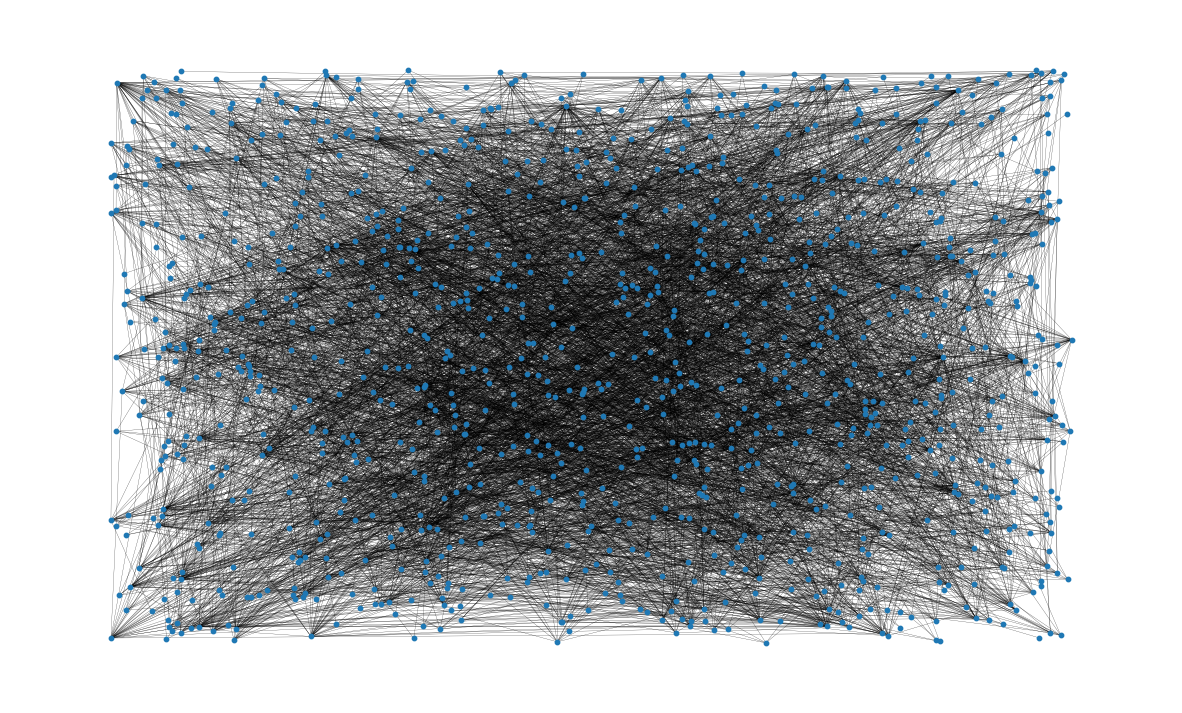

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

It’s clear that we need to impose more structure on the positioning of the if we want to get a sense for the data. For this, we can use the spring_layout function which is the default layout function for the networkx drawing module. The spring_layout function has the advantage that it takes into account the nodes and edges to compute locations of the nodes. The downside however, is that this process is much more computationally expensive, and can be quite slow for graphs with 100’s of nodes and 1000’s of edges.

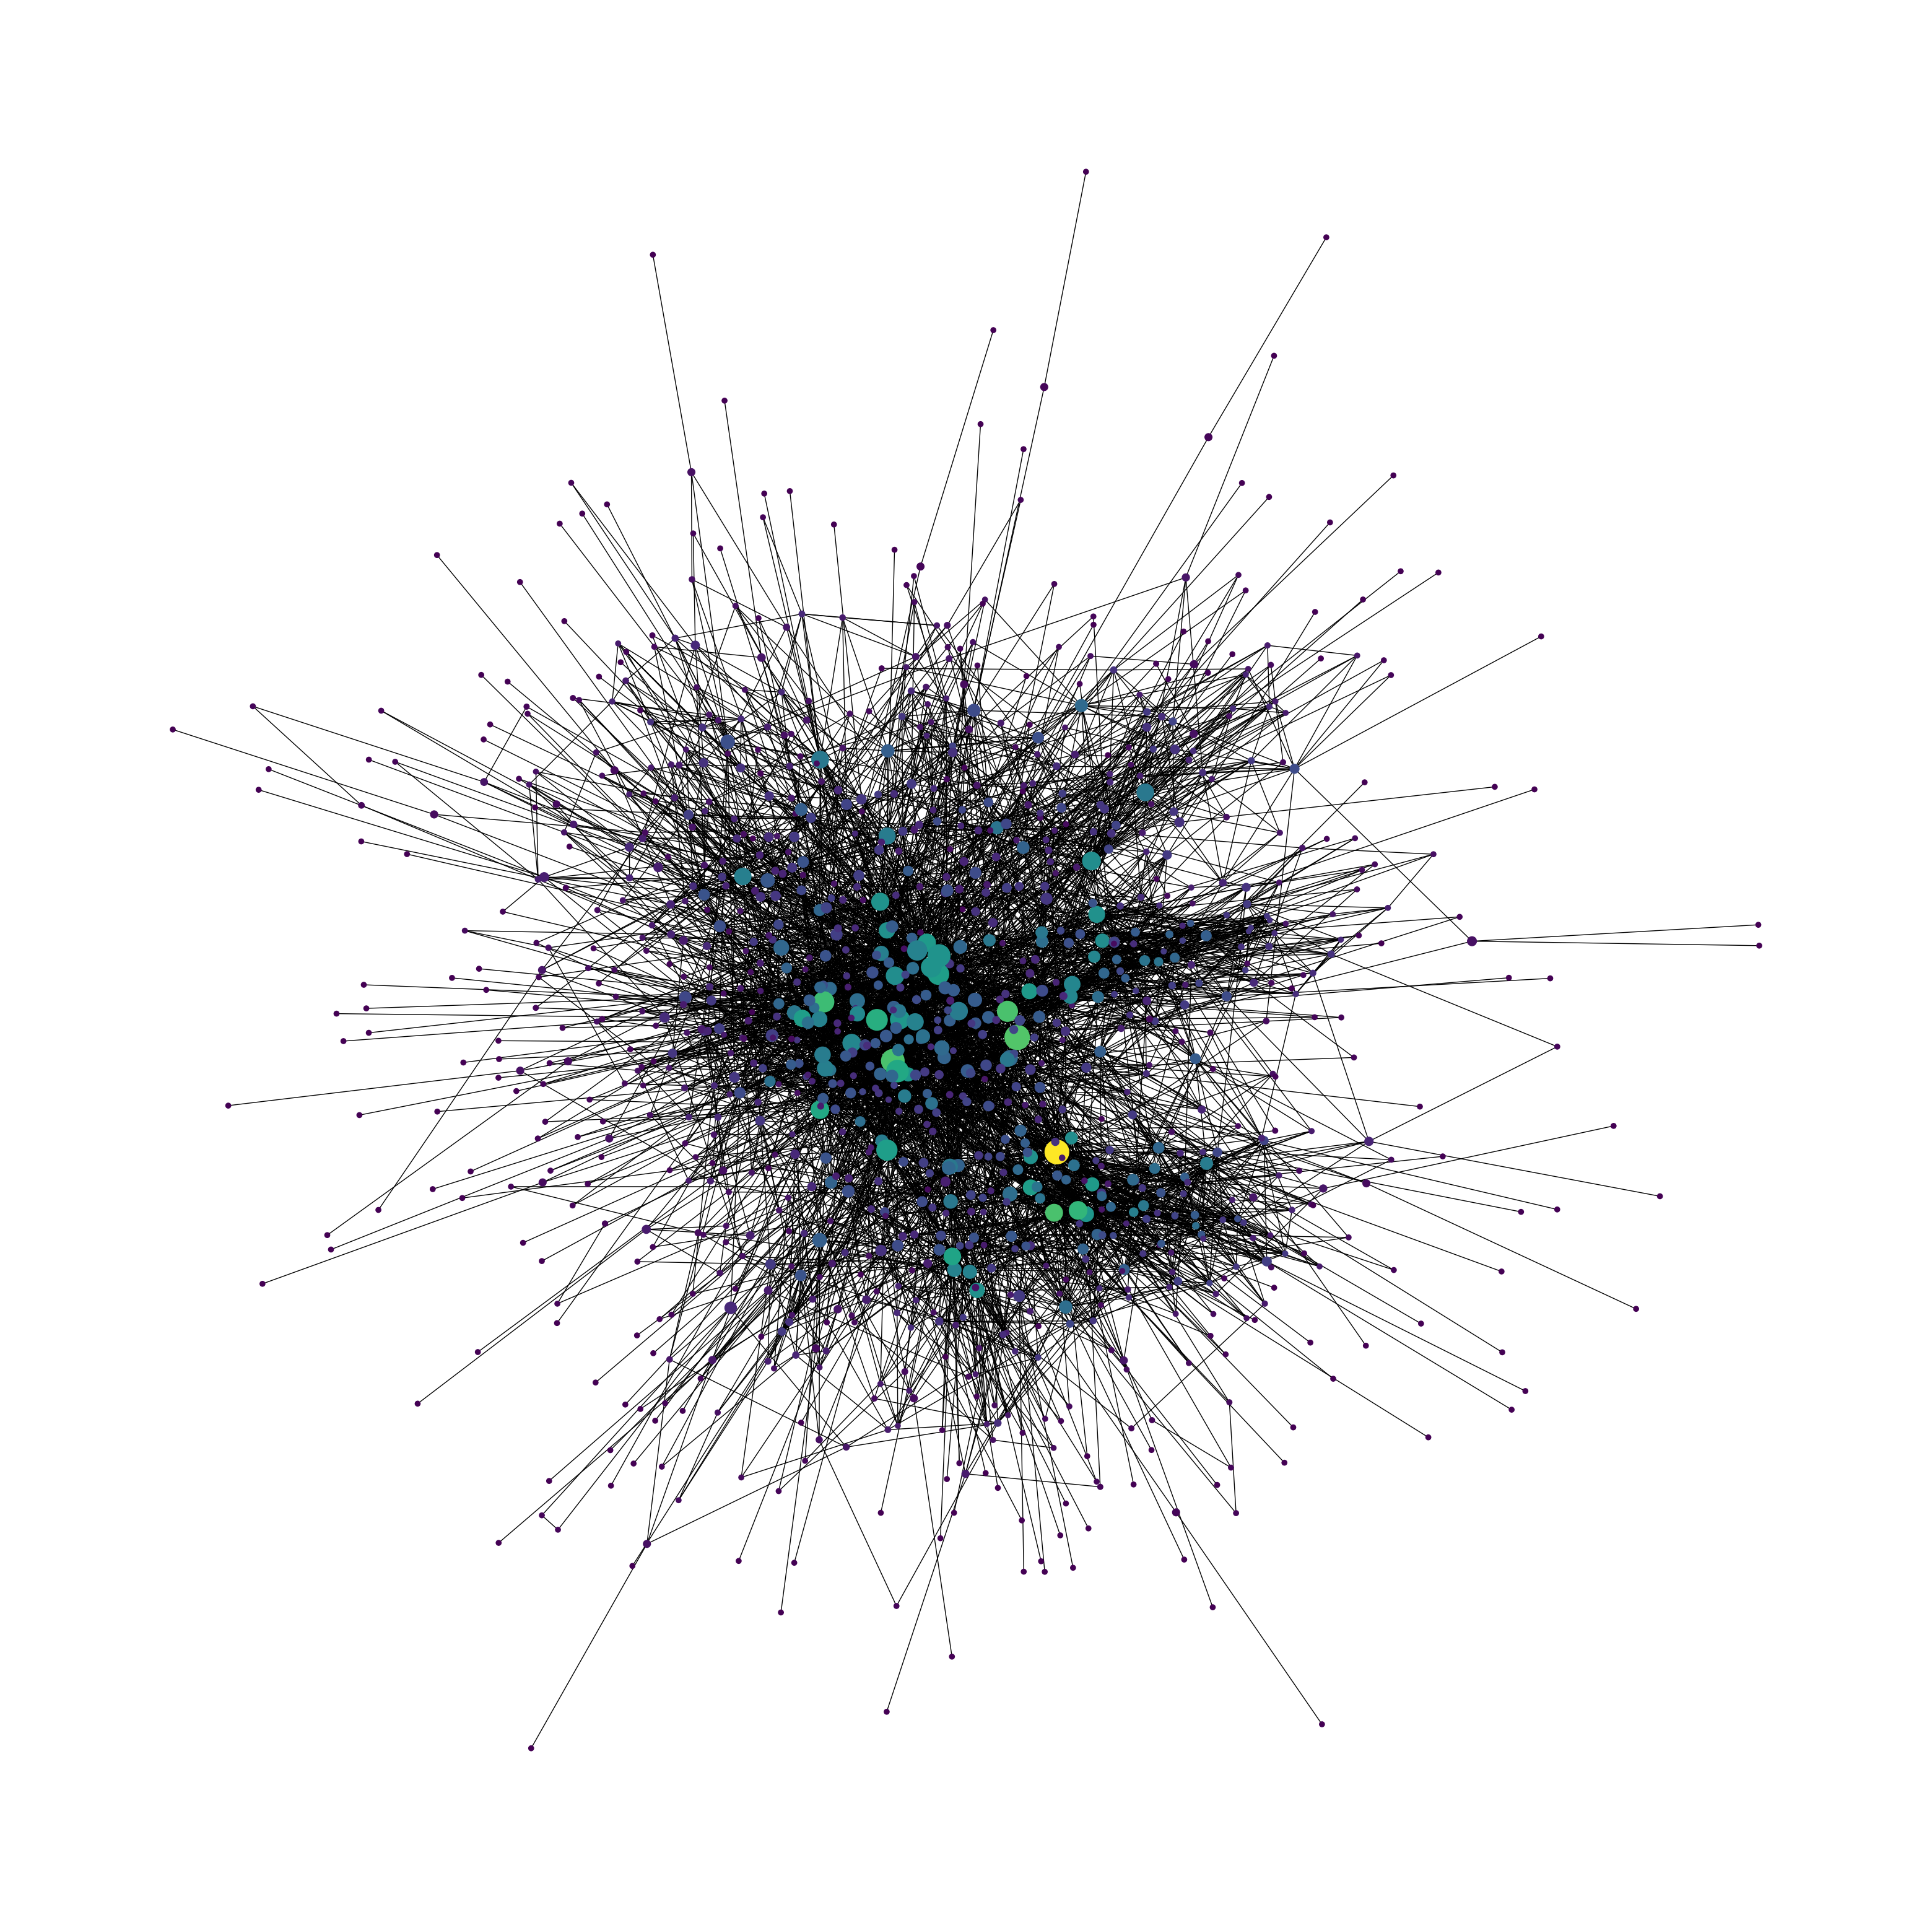

In [ ]:
pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [50000.0 * G.degree(v) for v in G]
node_size =  [v * 20000 for v in betCent.values()]
plt.figure(figsize=(40,40))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

In [ ]:
#Total number of nodes in network
G.number_of_nodes()


1133

In [ ]:
#Total number of edges
G.number_of_edges()

5451

Also, the average degree of a node can be seen.

On average, a node is connected to almost 44 other nodes, also known as neighbors of the node.

This has been calculated by creating a list of all the degrees of the nodes and using numpy.array to find the mean of the created list.

In [ ]:
np.mean([d for _, d in G.degree()])

9.62224183583407

We find the nodes with the highest degree centralities. Specifically, the nodes with the 8 highest degree centralities are shown below together with the degree centrality. That means that node 107
 has the highest degree centrality with 
, meaning that this facebook user is friends with around the 26% of the whole network.

In [ ]:
degree_centrality = nx.centrality.degree_centrality(G)
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(105, 0.0627208480565371),
 (333, 0.045936395759717315),
 (16, 0.045053003533568906),
 (23, 0.045053003533568906),
 (42, 0.045053003533568906),
 (41, 0.04328621908127209),
 (196, 0.04151943462897526),
 (233, 0.03975265017667844)]

(-1.199613833129406,
 1.1006979581713676,
 -1.0648583513498306,
 1.1838385206460953)

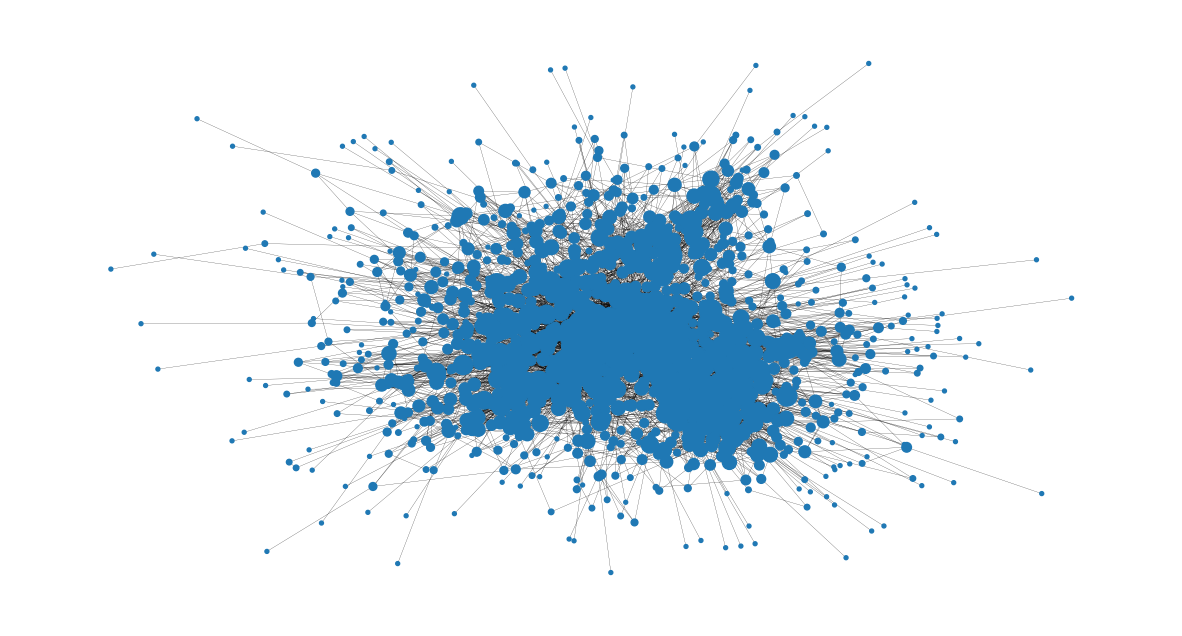

In [ ]:
node_size = [
    v * 9000 for v in degree_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

In [ ]:
betweenness_centrality = nx.centrality.betweenness_centrality(
    G
)  # save results in a variable to use again
(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(333, 0.03948985782790013),
 (105, 0.03693124853317947),
 (23, 0.033462977666082847),
 (578, 0.03155662746086827),
 (76, 0.030117501315083377),
 (233, 0.027717031244654997),
 (135, 0.027264467891820313),
 (41, 0.02649935713940744)]

Betweenness centrality measures the number of times a node lies on the shortest path between other nodes, meaning it acts as a bridge. In detail, betweenness centrality of a node 
 is the percentage of all the shortest paths of any two nodes (apart from 
), which pass through.

In [ ]:
betweenness_centrality = nx.centrality.betweenness_centrality(
    G
)  # save results in a variable to use again
(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(333, 0.03948985782790013),
 (105, 0.03693124853317947),
 (23, 0.033462977666082847),
 (578, 0.03155662746086827),
 (76, 0.030117501315083377),
 (233, 0.027717031244654997),
 (135, 0.027264467891820313),
 (41, 0.02649935713940744)]

In [ ]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5451 entries, 0 to 5450
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   start_node  5451 non-null   int64
 1   end_node    5451 non-null   int64
dtypes: int64(2)
memory usage: 85.3 KB


(-1.199613833129406,
 1.1006979581713676,
 -1.0648583513498306,
 1.1838385206460953)

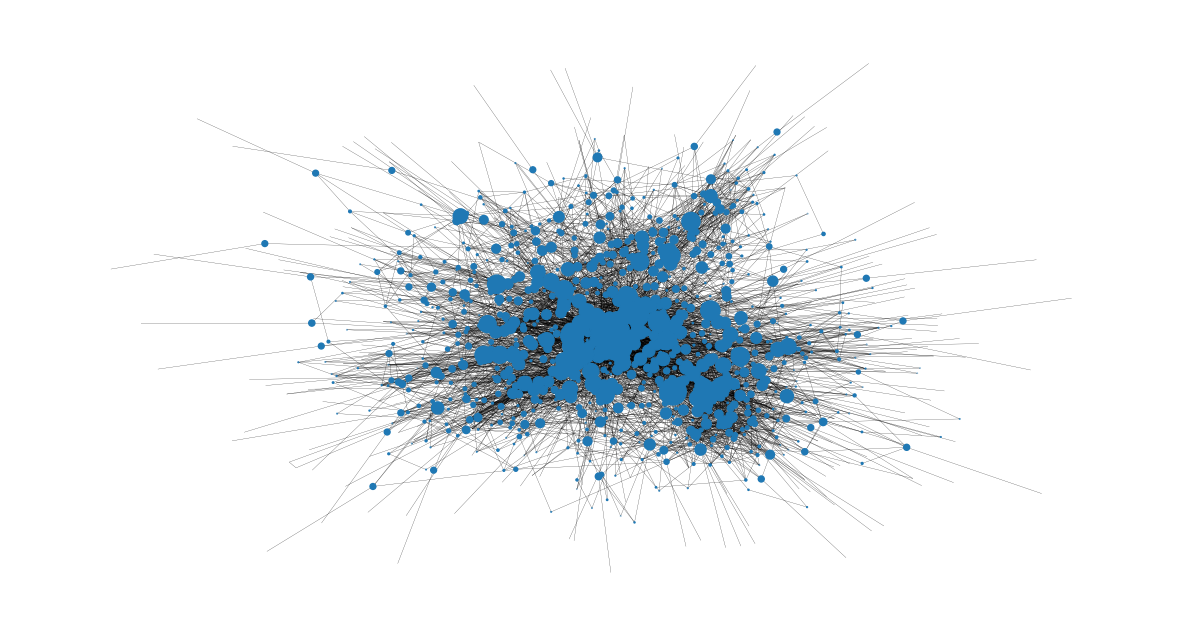

In [ ]:
node_size = [
    v * 10000 for v in betweenness_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

In [ ]:
# Average Shortest Path Lenght
nx.average_shortest_path_length(G)

3.606032017315423

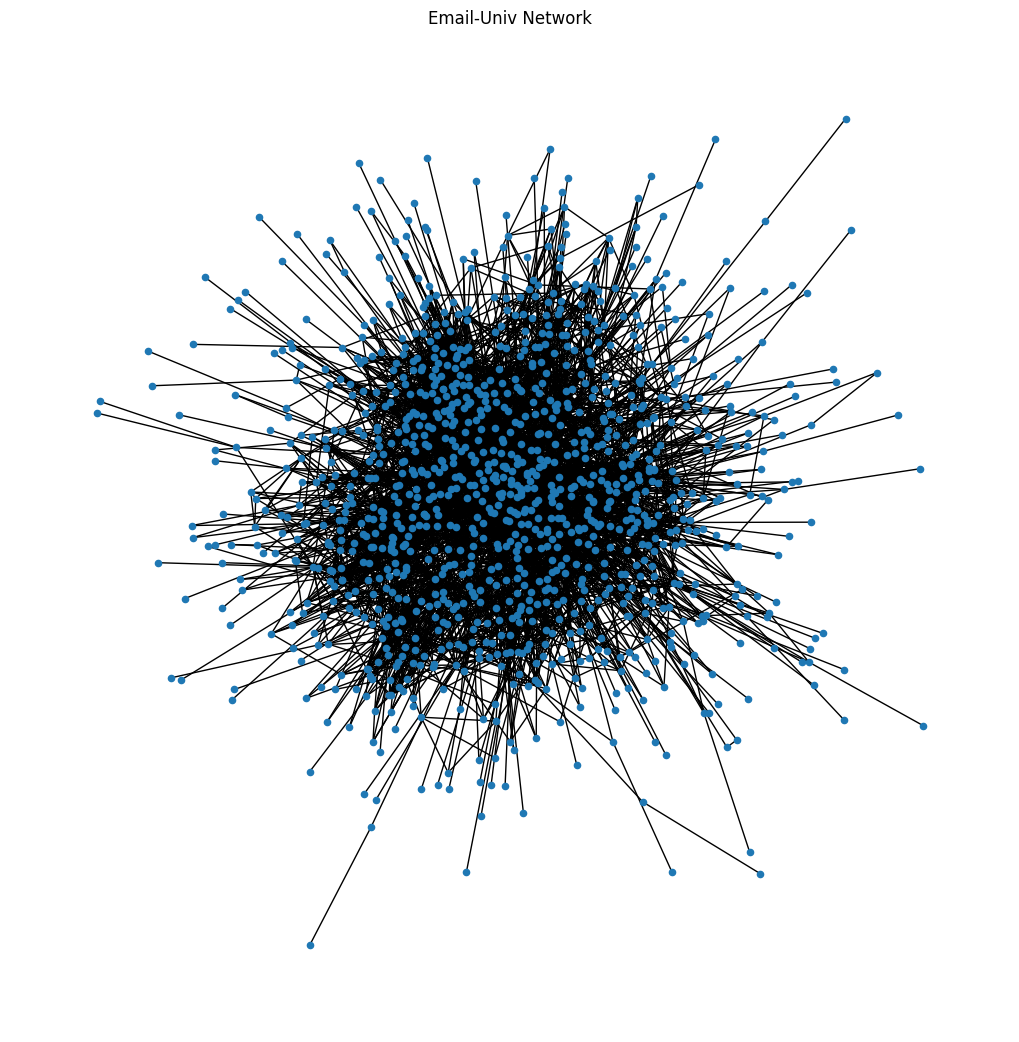

Degree Centrality: {2: 0.020318021201413426, 1: 0.026501766784452298, 3: 0.03356890459363958, 4: 0.019434628975265017, 5: 0.0088339222614841, 6: 0.018551236749116608, 7: 0.022968197879858657, 8: 0.007067137809187279, 9: 0.015017667844522967, 10: 0.028268551236749116, 11: 0.0176678445229682, 12: 0.015901060070671377, 13: 0.022084805653710248, 14: 0.03180212014134275, 15: 0.01678445229681979, 16: 0.045053003533568906, 17: 0.006183745583038869, 18: 0.015901060070671377, 19: 0.024734982332155476, 20: 0.015017667844522967, 21: 0.037985865724381625, 22: 0.013250883392226149, 23: 0.045053003533568906, 24: 0.037102473498233215, 25: 0.0176678445229682, 26: 0.0026501766784452294, 27: 0.018551236749116608, 28: 0.010600706713780918, 29: 0.007950530035335688, 30: 0.022968197879858657, 31: 0.019434628975265017, 32: 0.0026501766784452294, 33: 0.007067137809187279, 34: 0.01678445229681979, 35: 0.0008833922261484099, 36: 0.0008833922261484099, 37: 0.0008833922261484099, 38: 0.022084805653710248, 39: 0.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

# Load the dataset
G = nx.read_edgelist('email-univ.txt', create_using=nx.Graph(), nodetype=int)

# Plot the network graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=20, with_labels=False)
plt.title("Email-Univ Network")
plt.show()

# Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Community Detection using Louvain method
communities = community.greedy_modularity_communities(G)
community_dict = {node: i for i, community in enumerate(communities) for node in community}

# Print results
print("Degree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Eigenvector Centrality:", eigenvector_centrality)
print("Communities:", community_dict)


In [ ]:
# Community detection
community_dict = community_louvain.best_partition(G)
print(f"Number of communities detected: {len(set(community_dict.values()))}")


Number of communities detected: 11


In [ ]:
def draw_centrality(G, pos, centrality_dict, title, n=10):
    # Normalize centrality values
    norm_centrality = {k: v / max(centrality_dict.values()) for k, v in centrality_dict.items()}
    
    # Draw nodes with size proportional to centrality (rounded to the nearest whole number)
    node_size = [round(v * 500) for v in norm_centrality.values()] # Adjust node size
    nx.draw(G, pos, node_size=node_size, node_color=[50000.0 * G.degree(v) for v in G], with_labels=False, linewidths=0.5) # Set node color to black
   
    # Draw edge lines
    nx.draw_networkx_edges(G, pos, alpha=0.1, width=0.5) # Adjust edge width
    
    # Display top n nodes with the highest centrality values
    sorted_centrality = sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)[:n]
    top_node_colors = plt.cm.viridis(np.linspace(0, 1, n))
    
    for i, (node, centrality) in enumerate(sorted_centrality, start=1):
        text_pos = [coord * 1.05 for coord in pos[node]] # Adjust text position
        plt.annotate(f"{i}. {node}", text_pos, fontsize=8)
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=top_node_colors[i-1], node_size=node_size[node], linewidths=0.5)
    
    plt.title(title)
    plt.show()


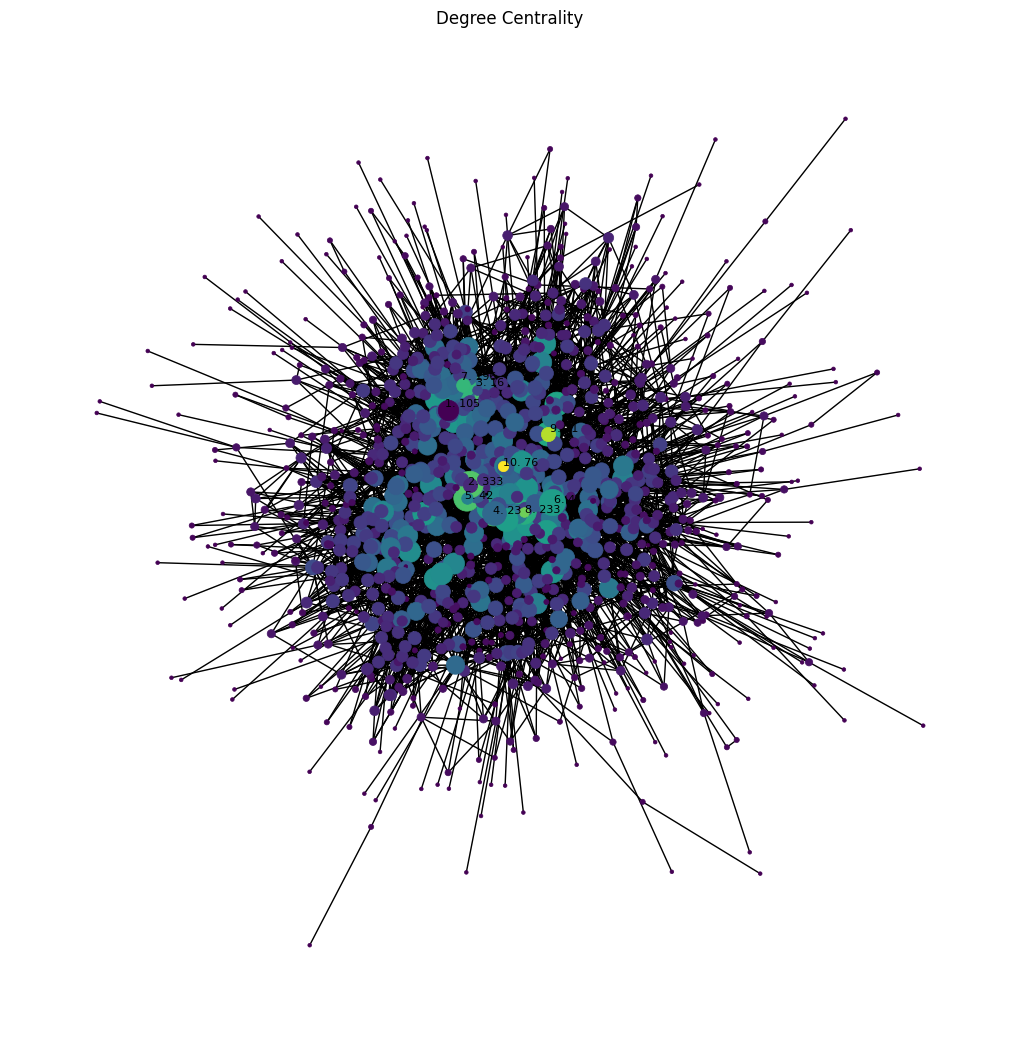

In [ ]:
# Visualize Degree Centrality
plt.figure(figsize=(10, 10))
draw_centrality(G, pos, degree_centrality, "Degree Centrality")



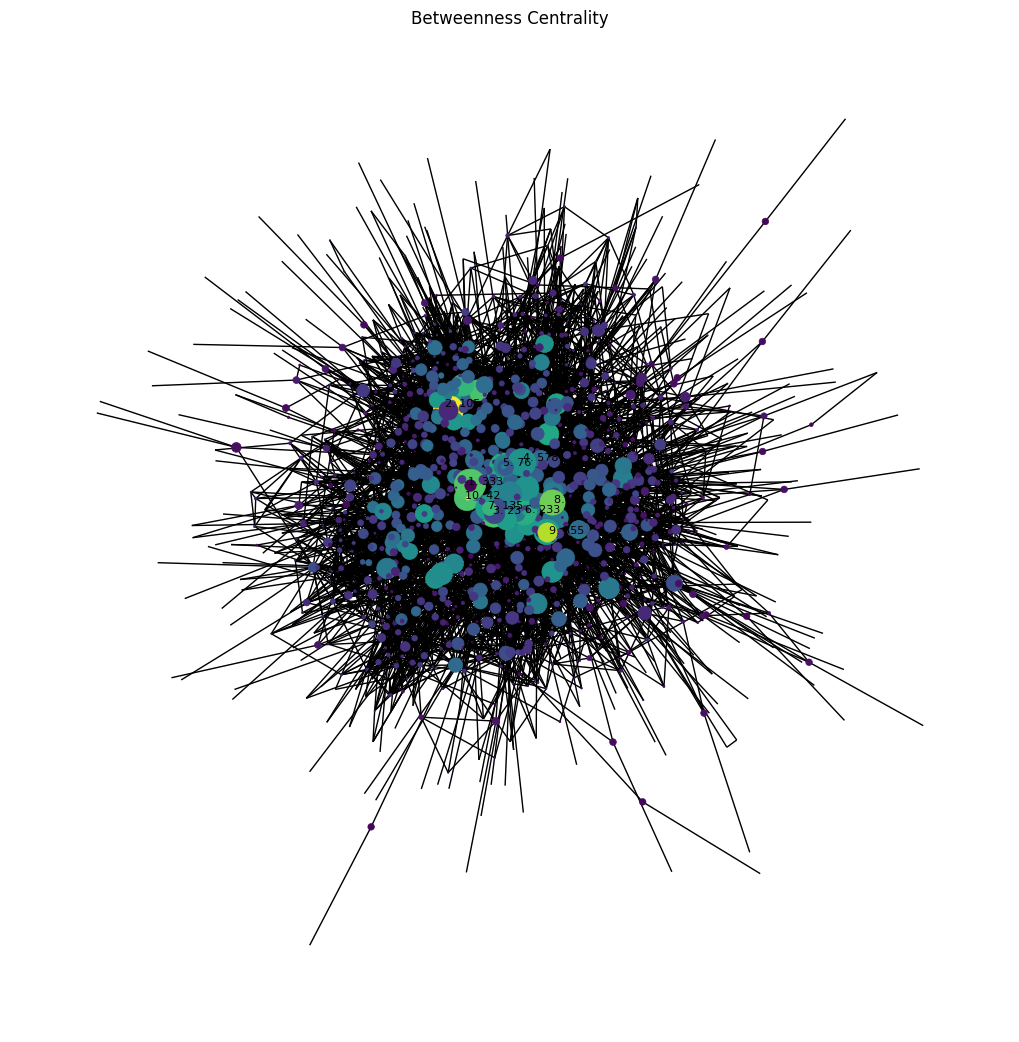

In [ ]:
# Visualize Betweenness Centrality
plt.figure(figsize=(10, 10))
draw_centrality(G, pos, betweenness_centrality, "Betweenness Centrality")

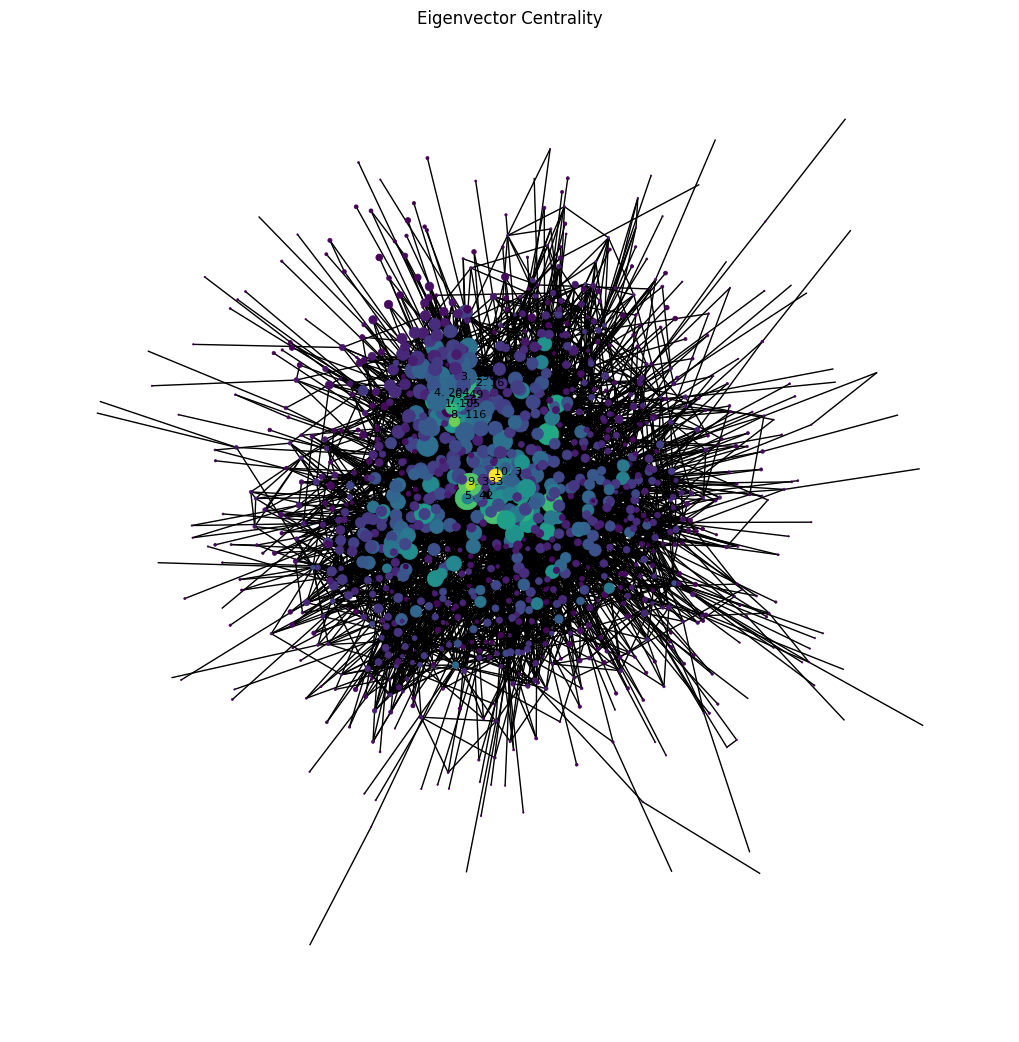

In [ ]:
# Visualize Eigenvector Centrality
plt.figure(figsize=(10, 10))
draw_centrality(G, pos, eigenvector_centrality, "Eigenvector Centrality")

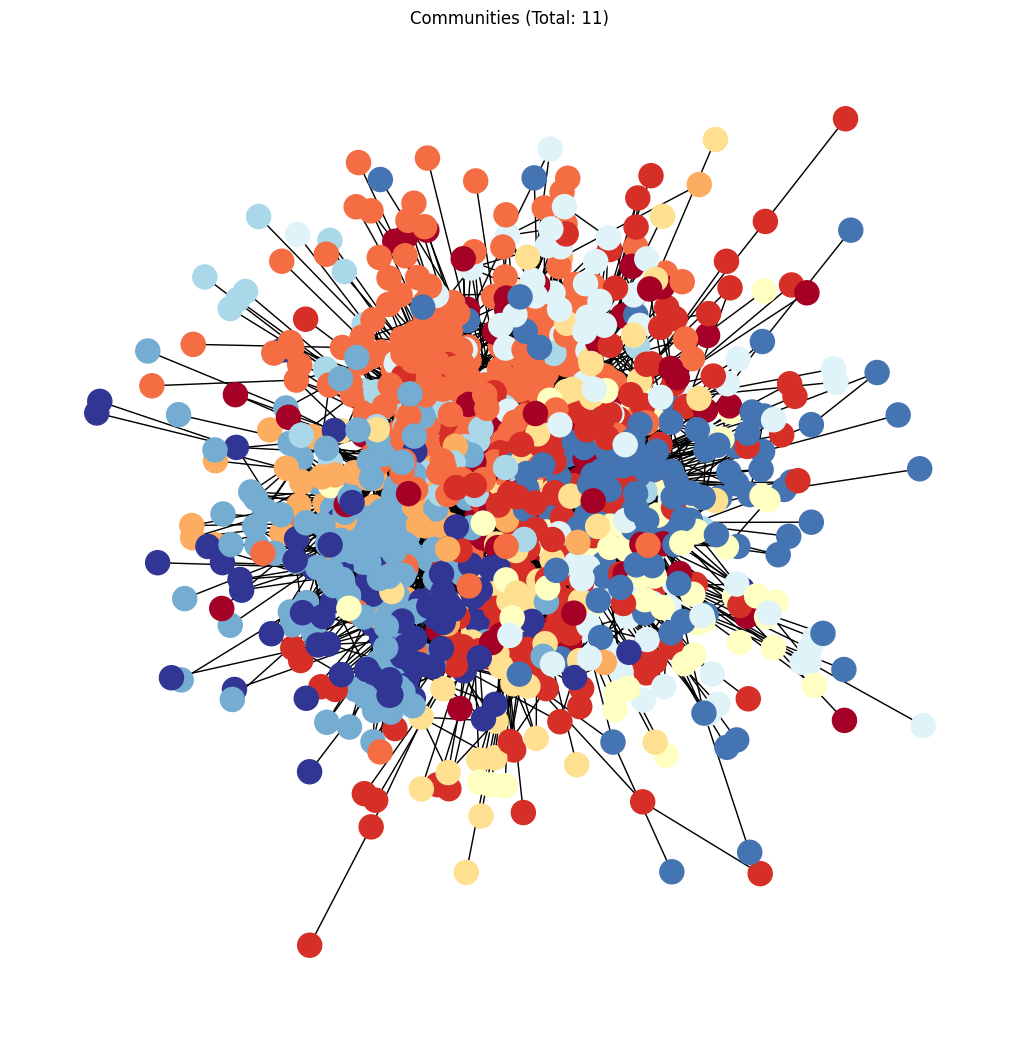

In [ ]:
# Visualize Communities
plt.figure(figsize=(10, 10))
color_map = [community_dict[node] for node in G.nodes]
nx.draw(G, pos, node_color=color_map, cmap=plt.cm.RdYlBu, with_labels=False)
nx.draw_networkx_edges(G, pos, alpha=0.1)
num_communities = len(set(community_dict.values()))
plt.title(f"Communities (Total: {num_communities})")
plt.show()

In [ ]:
from tabulate import tabulate

# Refactored function to display top n centrality measures in a table
def display_top_centrality_table(centrality_dict, measure_name, n=10):
    sorted_centrality = sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)[:n]
    
    # Prepare table data
    table_data = [[i+1, node, f"{centrality:.4f}"] for i, (node, centrality) in enumerate(sorted_centrality)]
    table_headers = ['Rank', 'Node', measure_name]
    
    # Print the table
    print(f"Top {n} nodes by {measure_name}:")
    print(tabulate(table_data, headers=table_headers, tablefmt='pretty'))
    print()

# Display top 10 nodes with the highest degree centrality in a table
display_top_centrality_table(degree_centrality, "Degree Centrality")


Top 10 nodes by Degree Centrality:
+------+------+-------------------+
| Rank | Node | Degree Centrality |
+------+------+-------------------+
|  1   | 105  |      0.0627       |
|  2   | 333  |      0.0459       |
|  3   |  16  |      0.0451       |
|  4   |  23  |      0.0451       |
|  5   |  42  |      0.0451       |
|  6   |  41  |      0.0433       |
|  7   | 196  |      0.0415       |
|  8   | 233  |      0.0398       |
|  9   |  21  |      0.0380       |
|  10  |  76  |      0.0380       |
+------+------+-------------------+



In [ ]:
# Display top 10 nodes with the highest degree centrality in a table
display_top_centrality_table(degree_centrality, "Degree Centrality")




Top 10 nodes by Degree Centrality:
+------+------+-------------------+
| Rank | Node | Degree Centrality |
+------+------+-------------------+
|  1   | 105  |      0.0627       |
|  2   | 333  |      0.0459       |
|  3   |  16  |      0.0451       |
|  4   |  23  |      0.0451       |
|  5   |  42  |      0.0451       |
|  6   |  41  |      0.0433       |
|  7   | 196  |      0.0415       |
|  8   | 233  |      0.0398       |
|  9   |  21  |      0.0380       |
|  10  |  76  |      0.0380       |
+------+------+-------------------+



In [ ]:
# Display top 10 nodes with the highest betweenness centrality in a table
display_top_centrality_table(betweenness_centrality, "Betweenness Centrality")



Top 10 nodes by Betweenness Centrality:
+------+------+------------------------+
| Rank | Node | Betweenness Centrality |
+------+------+------------------------+
|  1   | 333  |         0.0395         |
|  2   | 105  |         0.0369         |
|  3   |  23  |         0.0335         |
|  4   | 578  |         0.0316         |
|  5   |  76  |         0.0301         |
|  6   | 233  |         0.0277         |
|  7   | 135  |         0.0273         |
|  8   |  41  |         0.0265         |
|  9   | 355  |         0.0264         |
|  10  |  42  |         0.0260         |
+------+------+------------------------+



In [ ]:
# Display top 10 nodes with the highest eigenvector centrality in a table
display_top_centrality_table(eigenvector_centrality, "Eigenvector Centrality")

Top 10 nodes by Eigenvector Centrality:
+------+------+------------------------+
| Rank | Node | Eigenvector Centrality |
+------+------+------------------------+
|  1   | 105  |         0.2291         |
|  2   |  16  |         0.1653         |
|  3   | 196  |         0.1542         |
|  4   | 204  |         0.1349         |
|  5   |  42  |         0.1316         |
|  6   |  49  |         0.1279         |
|  7   |  56  |         0.1264         |
|  8   | 116  |         0.1250         |
|  9   | 333  |         0.1237         |
|  10  |  3   |         0.1207         |
+------+------+------------------------+

